In [1]:
import numpy as np
import tensorflow as tf

from tensorflow.python.client import device_lib

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    print(e)

1 Physical GPUs, 1 Logical GPU


2022-01-08 13:05:59.784434: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-08 13:05:59.880821: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-08 13:05:59.881696: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-08 13:05:59.884179: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [2]:
import pandas as pd

df = pd.read_csv('movie_plots_yts.csv',index_col=0)
df.shape

(33812, 3)

In [3]:
df

,Title,Plot,Genres
0,Who is Amos Otis?,"After assassinating the President, Amos Otis p...",Drama
1,Wheel of Time,Wheel of Time is Werner Herzog's photographed ...,Documentary
3,'B' Girl Rhapsody,Burlesque beauties performing their signature ...,Drama
5,The Brass Bottle,After being released from his bottle by Harold...,"Comedy, Fantasy"
6,The Morning After,The Morning After is a feature film that consi...,"Comedy, Drama"
...,...,...,...
38044,100 Bloody Acres,The use of dead car crash victims in the Morga...,"Action, Comedy, Horror"
38045,10 Years,"The night of their high school reunion, a grou...","Action, Comedy, Drama, Romance"
38046,10 Things I Hate About You,"Adapted from William Shakespeare's play ""The T...","Action, Comedy, Drama, Romance"
38047,+1,Three college friends hit the biggest party of...,"Action, Horror, Romance, Sci-Fi, Thriller"


In [4]:
#unique labels
set([g.strip() for row in df.Genres for g in row.split(",")])

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [5]:
def prep_genre(genre):
    
    dict_genres = {
        "Musical":"Music",
        "Crime":"Thriller",
        "Film-Noir":"Thriller",
        "Biography":"Documentary",
        "Sci-Fi":"Sci-Fi & Fantasy",
        "Fantasy":"Sci-Fi & Fantasy",
        "Action":"Action & Adventure",
        "Adventure":"Action & Adventure"
    }
        
    genre = genre.replace(" ","")
    
    if len(genre.split(",")) > 0:
        genres = genre.split(",")
        genres = ",".join(list(set([ dict_genres[genre] if genre in dict_genres.keys() else genre for genre in genres ])))
        
    return genres
    

In [6]:
prep_genre("Action, Comedy, Thriller, Film-Noir")

'Comedy,Thriller,Action & Adventure'

In [8]:
df['Genres'] = df['Genres'].apply(prep_genre)

In [9]:
#new unique labels
set([g.strip() for row in df.Genres for g in row.split(",")])

{'Action & Adventure',
 'Animation',
 'Comedy',
 'Documentary',
 'Drama',
 'Family',
 'History',
 'Horror',
 'Music',
 'Romance',
 'Sci-Fi & Fantasy',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [10]:
dummy_genres = df['Genres'].str.join(sep='').str.get_dummies(sep=',')
df = df.join(dummy_genres)

In [11]:
dummy_genres

,Action & Adventure,Animation,Comedy,Documentary,Drama,Family,History,Horror,Music,Romance,Sci-Fi & Fantasy,Sport,Thriller,War,Western
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
6,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38044,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
38045,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
38046,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
38047,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0


In [12]:
df.columns

Index(['Title', 'Plot', 'Genres', 'Action & Adventure', 'Animation', 'Comedy',
       'Documentary', 'Drama', 'Family', 'History', 'Horror', 'Music',
       'Romance', 'Sci-Fi & Fantasy', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [13]:
import re

#plot cleaning
df.Plot = df.Plot.apply(lambda x: re.sub("\\x97.*" , "", x).rstrip())
df.Plot.values[-100]


"Set in Ireland during the War of Independence, two sisters' lives are changed forever as they care for a wounded soldier in their home. What transpires in this historical period drama, is a tragic love story of an Anglo-Irish household and its inhabitants, caught in the crucible of deep dark secrets. Framed against a backdrop of a turbulent war-torn Ireland in the early1920's, May Collingwood is forced to make critical and difficult decisions when she rescues a British soldier and must now protect herself and sister Tilly. They live in fear of the British Black and Tans, the rising IRA, their own entrapment, and ultimately the dark secrets of un-requited love unfolding from within."

# Tokenization

In [14]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SpatialDropout1D
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_features = 10000
maxlen = 300
embedding_dims = 300

X = df['Plot'].values
y = np.array(df.drop(['Title','Plot','Genres'], axis=1))

In [15]:
X[4], y[4]

('The Morning After is a feature film that consists of 8 vignettes that are inter-cut throughout the film. The 8 vignettes are about when you wake up next to someone the next morning...',
 array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [16]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen, truncating='post')

len(tokenizer.word_index)

78806

# Embedding

## Glove

In [17]:
glove_emb_link = "https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip"

In [18]:
from io import BytesIO, TextIOWrapper
from zipfile import ZipFile
import requests

resp = requests.get(glove_emb_link)

In [19]:
embeddings_index = dict()

with ZipFile(BytesIO(resp.content),'r') as zipfile:
    with TextIOWrapper(zipfile.open("glove.6B.300d.txt"), encoding="utf-8") as file:
        for line in file:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400001 word vectors.


In [20]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((max_features, embedding_dims))
for word, i in list(tokenizer.word_index.items())[:max_features-1]:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print(len(embedding_matrix))

10000


In [21]:
resp = None

## Classification

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## LSTM

In [23]:
from keras.layers import Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, schedules
from tensorflow.keras.optimizers.schedules import ExponentialDecay

n_labels = len(set([g for row in df.Genres for g in row.split(",")]))
hidden_dims = 40

In [24]:
from keras import backend as K

#keras custom f1_score metric
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric."""

        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric."""

        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
        
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### Training

In [25]:
e = Embedding(max_features,
              embedding_dims, 
              weights=[embedding_matrix], 
              input_length=maxlen, 
              trainable=False)

model = Sequential()
model.add(e)
#model.add(Dropout(0.1))
model.add(LSTM(hidden_dims, dropout=0.4))
model.add(Dropout(0.4))
model.add(Dense(n_labels, activation='sigmoid'))

lr_schedule = ExponentialDecay(0.01, 100, 0.95, staircase=False, name=None)
opt = Adam(lr_schedule)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=[f1])

In [26]:
batch_size = 512
epochs = 50
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)


print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          callbacks=[es])

Train...
Epoch 1/50


2022-01-08 13:07:43.559034: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-08 13:07:45.989691: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


43/43 [==============================] - 6s 47ms/step - loss: 0.3980 - f1: 0.4477 - val_loss: 0.3468 - val_f1: 0.4552
Epoch 2/50
43/43 [==============================] - 2s 37ms/step - loss: 0.3460 - f1: 0.5117 - val_loss: 0.3124 - val_f1: 0.5601
Epoch 3/50
43/43 [==============================] - 2s 37ms/step - loss: 0.3201 - f1: 0.5805 - val_loss: 0.2956 - val_f1: 0.6064
Epoch 4/50
43/43 [==============================] - 2s 37ms/step - loss: 0.3085 - f1: 0.6005 - val_loss: 0.2866 - val_f1: 0.6354
Epoch 5/50
43/43 [==============================] - 2s 37ms/step - loss: 0.3001 - f1: 0.6181 - val_loss: 0.2814 - val_f1: 0.6276
Epoch 6/50
43/43 [==============================] - 2s 37ms/step - loss: 0.2961 - f1: 0.6228 - val_loss: 0.2772 - val_f1: 0.6574
Epoch 7/50
43/43 [==============================] - 2s 38ms/step - loss: 0.2916 - f1: 0.6298 - val_loss: 0.2743 - val_f1: 0.6466
Epoch 8/50
43/43 [==============================] - 2s 37ms/step - loss: 0.2888 - f1: 0.6350 - val_loss: 0.2

#### Training visualization

In [27]:
train_loss = model.history.history['loss']
train_f1 = model.history.history['f1']

val_loss = model.history.history['val_loss']
val_f1 = model.history.history['val_f1']

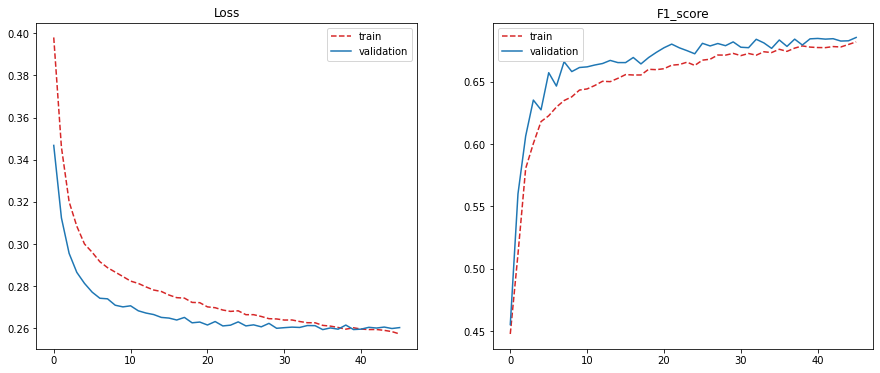

In [28]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
ax1.plot(train_loss, color='tab:red',label='train', linestyle='dashed')
ax1.plot(val_loss, color='tab:blue', label='validation')
ax1.set_title("Loss")
ax1.legend()
ax2.plot(train_f1, color='tab:red',label='train',linestyle='dashed')
ax2.plot(val_f1, color='tab:blue', label='validation')
ax2.set_title("F1_score")
ax2.legend()
plt.show()

### Prediction

In [29]:
from sklearn.metrics import f1_score

y_pred = model.predict([X_test], verbose=3)
print("Keras custom f1:",f1(y_test.astype(np.float32),y_pred).numpy())
print("Sklearn f1_micro:",f1_score(y_test,y_pred.round(), average='micro'))

Keras custom f1: 0.6863842
Sklearn f1_micro: 0.686384210970227


In [31]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(y_test, y_pred.round())

array([[[   0, 1645],
        [   0, 5118]],

       [[6402,   48],
        [ 243,   70]],

       [[4000,  627],
        [ 968, 1168]],

       [[5681,  156],
        [ 370,  556]],

       [[2506,  926],
        [ 996, 2335]],

       [[6098,   91],
        [ 412,  162]],

       [[6421,   13],
        [ 309,   20]],

       [[5708,  185],
        [ 330,  540]],

       [[6300,   55],
        [ 300,  108]],

       [[5282,  250],
        [ 785,  446]],

       [[5633,  182],
        [ 547,  401]],

       [[6527,   34],
        [ 141,   61]],

       [[4532,  442],
        [ 788, 1001]],

       [[6438,   51],
        [ 139,  135]],

       [[6555,   12],
        [ 110,   86]]])